In [145]:
import pandas as pd
from sqlalchemy import create_engine
import os
import matplotlib.pylab as plt

db_pass = os.environ['NFL_DB_PASS']

engine = create_engine('postgresql://postgres:{}@localhost:5432/nfl'.format(db_pass))

%matplotlib inline

In [16]:
query = """select
	ppr.role,
	pi.play_type,
	count(*),
	sum(case when inj.gsisid is null then 0 else 1 end) as injured_count,
	sum(case when part.gsisid is null then 0 else 1 end) as partner_count,
	round(avg(summary.avg_mph), 2) as avg_mph,
	round(avg(summary.max_mph), 2) as max_mph
from play_player_role_data ppr
left join play_information pi -- join on play information to show all are punts
on
	ppr.season_year = pi.season_year and
	ppr.gamekey = pi.gamekey and
	ppr.playid = pi.playid
left join video_review inj -- join for injured player
on
	ppr.season_year = inj.season_year and
	ppr.gamekey = inj.gamekey and
	ppr.playid = inj.playid and
	ppr.gsisid = inj.gsisid
left join video_review part -- join for partner causing injury
on
	ppr.season_year = part.season_year and
	ppr.gamekey = part.gamekey and
	ppr.playid = part.playid and
	ppr.gsisid = part.primary_partner_gsisid
left join ngs_gsisid_summary summary
on
	ppr.season_year = summary.season_year and
	ppr.gamekey = summary.gamekey and
	ppr.playid = summary.playid and
	ppr.gsisid = summary.gsisid
group by
	ppr.role,
	pi.play_type
order by count(*) desc"""

avgbypos = pd.read_sql(query, engine)

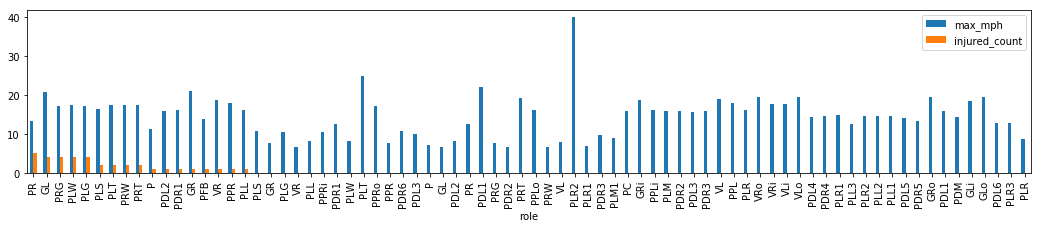

In [21]:
avgbypos.set_index('role')[['max_mph','injured_count']].sort_values('injured_count', ascending=False).plot(kind='bar', figsize=(18, 3))

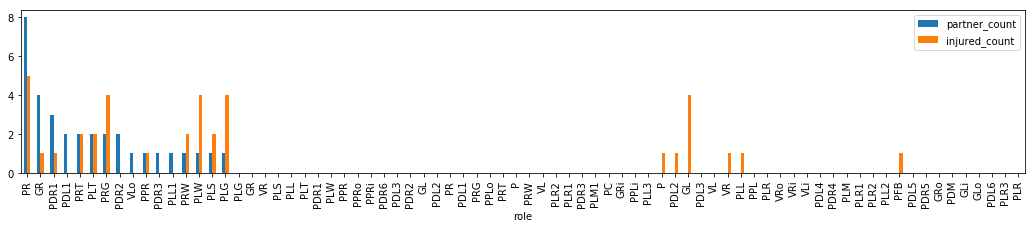

In [24]:
avgbypos.set_index('role')[['partner_count','injured_count']].sort_values('partner_count', ascending=False).plot(kind='bar', figsize=(18, 3))

In [29]:
avgbypos.loc[(avgbypos['injured_count'] > 0) | (avgbypos['partner_count'] > 0)].sort_values('role')

,role,play_type,count,injured_count,partner_count,avg_mph,max_mph
13,GL,Punt,6628,4,0,5.49,20.74
14,GR,Punt,6613,1,4,5.54,21.10
4,P,Punt,6666,1,0,3.68,11.26
1,PDL1,Punt,6671,0,2,4.86,15.99
12,PDL2,Punt,6648,1,0,4.66,15.82
2,PDR1,Punt,6668,1,3,4.84,16.02
10,PDR2,Punt,6654,0,2,4.65,15.90
16,PDR3,Punt,4972,0,1,4.58,15.80
34,PFB,Punt,324,1,0,3.97,13.80
5,PLG,Punt,6665,4,1,4.80,17.17


In [130]:
generalized_position = {'GL' : 'Gunner',
                        'GLi' : 'Gunner',
                        'GLo' : 'Gunner',
                        'GR' : 'Gunner',
                        'GRi' : 'Gunner',
                        'GRo' : 'Gunner',
                        'P' : 'Punter',
                        'PC' : 'Punter_Protector',
                        'PPR' : 'Punter_Protector',
                        'PPRi' : 'Punter_Protector',
                        'PPRo' : 'Punter_Protector',
                        'PDL1' : 'Defensive_Lineman',
                        'PDL2' : 'Defensive_Lineman',
                        'PDL3' : 'Defensive_Lineman',
                        'PDR1' : 'Defensive_Lineman',
                        'PDR2' : 'Defensive_Lineman',
                        'PDR3' : 'Defensive_Lineman',
                        'PDL5' : 'Defensive_Lineman',
                        'PDL6' : 'Defensive_Lineman',
                        'PFB' : 'PuntFullBack',
                        'PLG' : 'Punting_Lineman',
                        'PLL' : 'Punting_Lineman',
                        'PLL1' : 'Punting_Lineman',
                        'PLL3' : 'Punting_Lineman',
                        'PLS' : 'Punting_Lineman',
                        'PLT' : 'Punting_Lineman',
                        'PLW' : 'Punting_Wing',
                        'PRW' : 'Punting_Wing',
                        'PR' : 'Punt_Returner',
                        'PRG' : 'Punting_Lineman',
                        'PRT' : 'Punting_Lineman',
                        'VLo' : 'Jammer',
                        'VR' : 'Jammer',
                        'VL' : 'Jammer',
                        'VRo' :'Jammer', 
                        'VRi' : 'Jammer', 
                        'VLi' : 'Jammer',
                        'PPL' : 'Punter_Protector',
                        'PPLo' : 'Punter_Protector',
                        'PPLi' : 'Punter_Protector',
                        'PLR' : 'Defensive_Backer',
                        'PRRo' : 'Defensive_Backer',
                        'PDL4' : 'Defensive_Lineman', 
                        'PDR4' : 'Defensive_Lineman',
                        'PLM' : 'Defensive_Backer',
                        'PLM1' : 'Defensive_Backer', 
                        'PLR1' : 'Defensive_Backer',
                        'PLR2' : 'Defensive_Backer',
                        'PLR3' : 'Defensive_Backer',
                        'PLL2': 'Defensive_Backer',
                        'PDM' : 'Defensive_Lineman',
                        'PDR5' : 'Defensive_Lineman',
                        'PDR6' : 'Defensive_Lineman',
}

In [131]:
avgbypos['General_Role'] = avgbypos.role.replace(generalized_position)

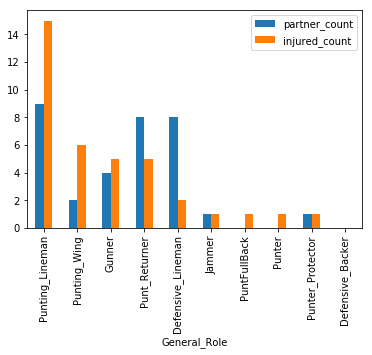

In [132]:
avgbypos.groupby('General_Role').sum().sort_values('injured_count', ascending=False)[['partner_count','injured_count']].plot(kind='bar')

In [133]:
avgbypos.loc[avgbypos['General_Role'] == 'Punting_Lineman']

,role,play_type,count,injured_count,partner_count,avg_mph,max_mph,General_Role
3,PRG,Punt,6667,4,2,4.81,17.24,Punting_Lineman
5,PLG,Punt,6665,4,1,4.80,17.17,Punting_Lineman
6,PRT,Punt,6663,2,2,4.88,17.41,Punting_Lineman
7,PLS,Punt,6658,2,1,4.87,16.46,Punting_Lineman
8,PLT,Punt,6657,2,2,4.89,17.44,Punting_Lineman
20,PLL,Punt,2813,1,0,4.65,16.17,Punting_Lineman
33,PLL1,Punt,543,0,1,4.36,14.70,Punting_Lineman
44,PLL3,Punt,12,0,0,3.41,12.46,Punting_Lineman
51,PLT,None,2,0,0,1.92,24.95,Punting_Lineman
55,PLL,None,2,0,0,2.35,8.08,Punting_Lineman


# Confirm MY query is correct by summing the number of players
## Should be 666 plays * 22 players = 14652

In [134]:
666 * 22

14652

# What is PRG?

In [135]:
gamekey=364
season_year=2017
playid=2764

sql = """
    select * from
    ngs 
    where
    gamekey = {} and
    season_year = {} and
    playid = {}
    """.format(364, 2017, 2764)

play = pd.read_sql(sql, engine)

In [136]:
pprd = pd.read_sql('select * from play_player_role_data', engine)

In [137]:
vr = pd.read_sql('select * from video_review', engine)

In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import bokeh
from bokeh.io import show, output_notebook, push_notebook
from bokeh.layouts import row, column, widgetbox
from bokeh.plotting import figure
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label
from bokeh.models import BoxAnnotation
from bokeh.models.glyphs import Text

output_notebook()


gamekey=364
season_year=2017
playid=2764

play = pd.merge(play, pprd)
playxy = play.drop(['season_year','gamekey'], axis=1) \
    .pivot(index='time',
           columns='role',
           values=['x','y'])

# Create colors
colors = ['red' if x in(vr['gsisid'].values) or x in(vr['primary_partner_gsisid'].values) else 'blue' for x in play.gsisid.unique()]

# Setup Figure
## Football Field Figure
fig = figure(plot_width=800, plot_height=400, x_range=(0,120), y_range=(0, 53.3))
fig.xgrid.grid_line_color = None
fig.ygrid.grid_line_color = None
# Green Field
box = BoxAnnotation(left=0, right=120, fill_color='green', fill_alpha=0.5)
endzone1 = BoxAnnotation(left=0, right=10, fill_color='grey', fill_alpha=0.5)
endzone2 = BoxAnnotation(left=110, right=120, fill_color='grey', fill_alpha=0.5)
fig.add_layout(box)
fig.add_layout(endzone1)
fig.add_layout(endzone2)
# Add lines|
fig.line([10,10,20,20,30,30,40,40,50,50,60,60,70,70,80,80,90,90,
          100,100,110,110,120,120],
         [55.5,0,0,55.5,55.5,0,0,55.5,55.5,0,0,55.5,55.5,0,0,55.5,
         55.5,0,0,55.5,55.5,0,0,0], line_color='grey')
# Line numbers

line_nums = ColumnDataSource(dict(x=[20, 30, 40, 50, 60, 70, 80, 90, 100],
                                  y=[5, 5, 5, 5, 5, 5, 5, 5, 5],
                                  text=['10', '20', '30','40','50','40','30','20','10']))
glyph = Text(x="x", y="y", text="text", angle=0, text_color="black", text_align='center')
fig.add_glyph(line_nums, glyph)

# Create values used in the initial states
x_values = playxy.loc[playxy.index[1]]['x'].values
y_values = playxy.loc[playxy.index[1]]['y'].values
gsisid = playxy['x'].columns.values
source = ColumnDataSource(data=dict(x=x_values,
                                    y=y_values,
                                    gsisid=gsisid))
labels = LabelSet(x='x', y='y', text='gsisid', level='glyph',
              x_offset=5, y_offset=5, source=source, render_mode='canvas')

# Add players as circles
plt = fig.circle(x_values, y_values, size=20, alpha=0.5, color=colors, radius=1)
fig.add_layout(labels)

def plot_time_pos(time_pos):
    x_values = playxy.loc[playxy.index[time_pos]]['x'].values
    y_values = playxy.loc[playxy.index[time_pos]]['y'].values
    gsisid = playxy['x'].columns.values
    # p = figure(plot_width=800, plot_height=400)
    # p.circle(x_values, y_values, size=20, color="navy", alpha=0.5)
    source = ColumnDataSource(data=dict(x=x_values,
                                    y=y_values,
                                    gsisid=gsisid))
    labels = LabelSet(x='x', y='y', text='gsisid', level='glyph',
               x_offset=5, y_offset=5, source=source, render_mode='canvas')
    fig.renderers.pop()
    fig.add_layout(labels)
    plt.data_source.data['x'] = x_values
    plt.data_source.data['y'] = y_values

    push_notebook(handle=bokeh_handle)


source = ColumnDataSource(data=dict(x=x_values, y=y_values))

callback = CustomJS(code="""
if (IPython.notebook.kernel !== undefined) {
    var kernel = IPython.notebook.kernel;
    cmd = "plot_time_pos(" + cb_obj.value + ")";
    kernel.execute(cmd, {}, {});
}
""")


slider = Slider(start=1,
                end=len(playxy),
                value=1,
                step=1,
                title="position within play",
                callback=callback)

layout = column(
    widgetbox(slider),
    fig,
)

bokeh_handle = show(layout, notebook_handle=True)

Loading BokehJS ...